# Clustering

## Problem statement 1:
    
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.
  

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib  inline
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering as agg
import scipy 
from scipy.cluster import hierarchy as sch
from sklearn.metrics import silhouette_score as sil
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN as dbs
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\Clustering assignment

04-02-2023  13:28    <DIR>          .
04-02-2023  13:28    <DIR>          ..
04-02-2023  13:28    <DIR>          .ipynb_checkpoints
19-01-2023  00:47         1,579,517 Assignment no. 7.ipynb
13-01-2023  17:59           (1,328) crime_data.csv
13-01-2023  17:59         (268,963) EastWestAirlines.xlsx
13-01-2023  17:59           (1,560) Problem_Statement(Airlines).txt
13-01-2023  17:59             (389) ProblemSatement(crime_data).txt
               5 File(s)      1,851,757 bytes
               3 Dir(s)  143,495,467,008 bytes free


### Reading file

In [4]:
# Reading excel file with panda
air_lines1 = pd.read_excel("EastWestAirlines.xlsx",sheet_name = 'data')
air_lines1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### EDA

In [5]:
# measuring shape
air_lines1.shape

(3999, 12)

In [6]:
# Describing file
air_lines1.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# Reading info
air_lines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
air_lines1.duplicated().sum()

0

In [9]:
air_lines1.value_counts()

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?
1     28143    0           1          1          1          174          1            0                  0                7000               0         1
2691  11836    0           1          1          1          5075         14           350                1                2479               1         1
2678  27438    0           1          1          1          2528         6            2528               6                2490               0         1
2679  14748    0           1          1          1          2210         7            0                  0                2497               1         1
2680  49514    0           1          1          1          4500         22           0                  0                2569               0         1
                                                                                       

In [10]:
corr = air_lines1.corr()
corr

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


### Data Preprocessing

In [11]:
# Renaming the column name 'Award?' and 'ID#'
air_lines=air_lines1.rename(columns={'Award?':'Award','ID#':'ID'})
air_lines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
# Dropping the column ID
air_lines = air_lines.drop(['ID'],axis=1)
air_lines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Visualization

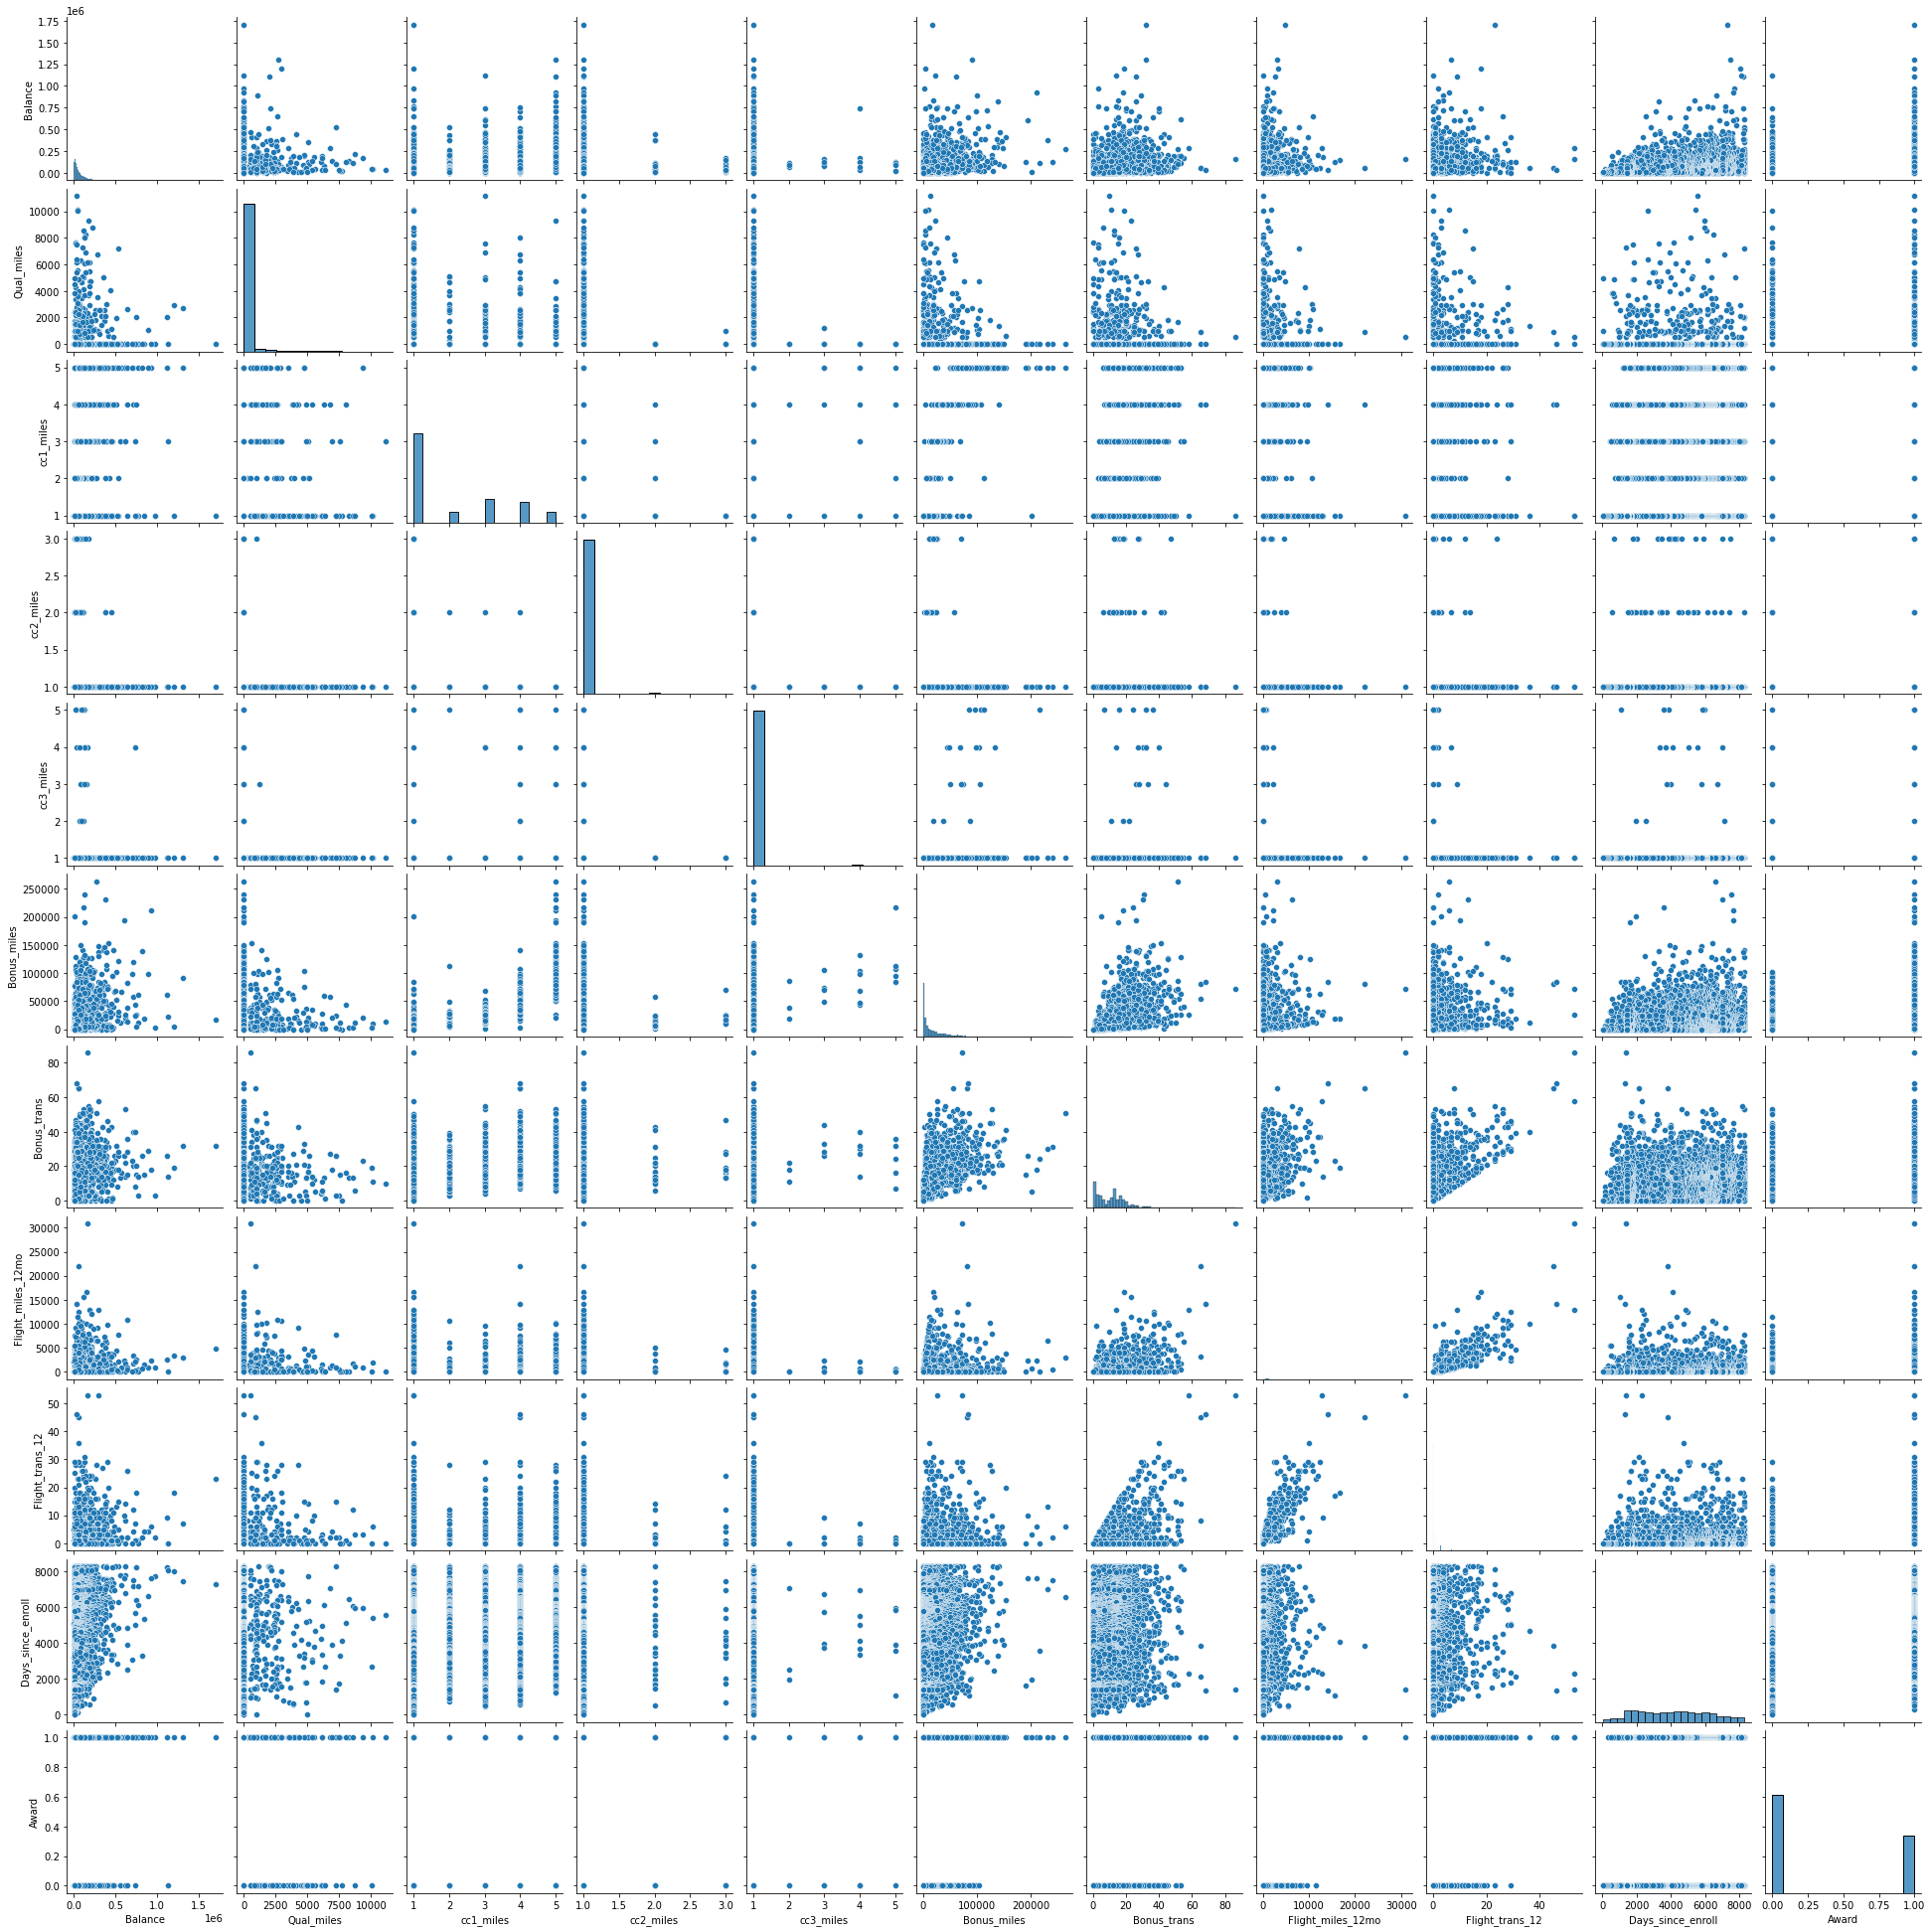

In [434]:
# Pair plot
sns.pairplot(air_lines)

<Figure size 1440x1440 with 0 Axes>

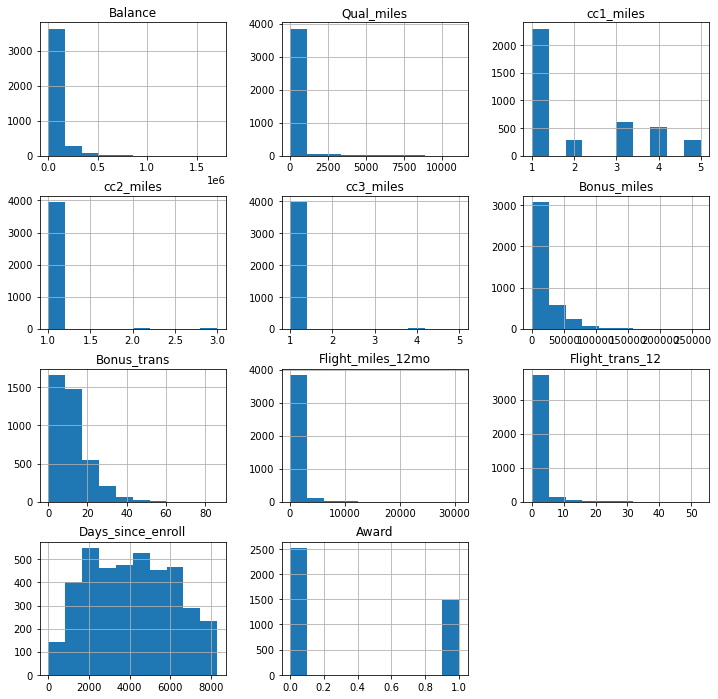

In [13]:
# Histogram
plt.figure(figsize=(20,20))
air_lines.hist(figsize=(12,12))
plt.show()

Balance


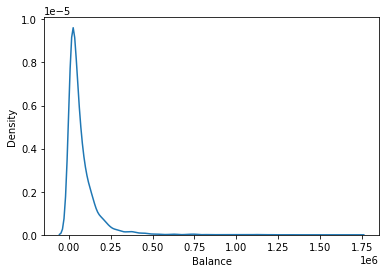

Qual_miles


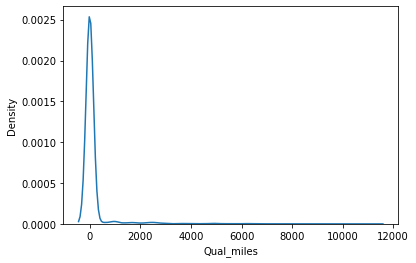

cc1_miles


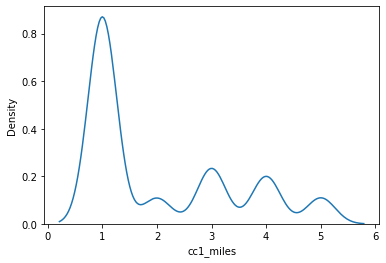

cc2_miles


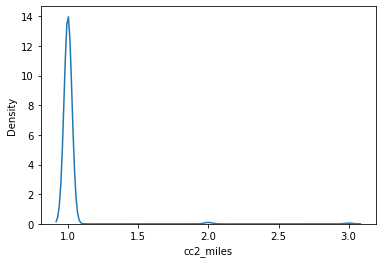

cc3_miles


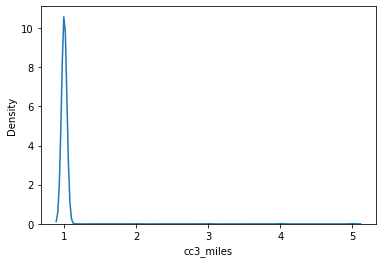

Bonus_miles


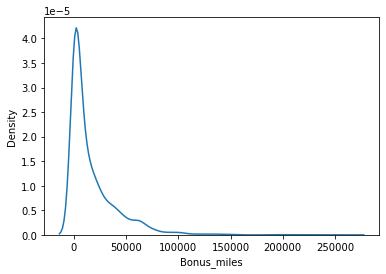

Bonus_trans


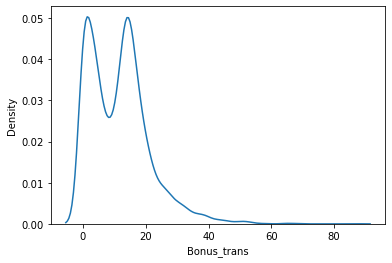

Flight_miles_12mo


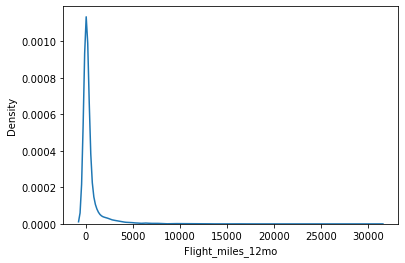

Flight_trans_12


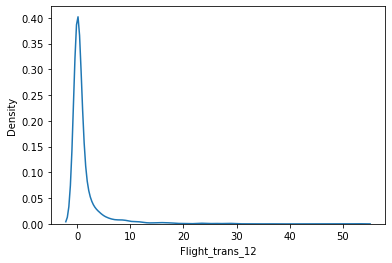

Days_since_enroll


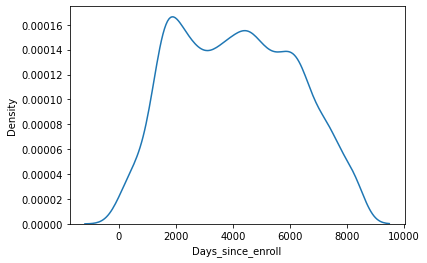

Award


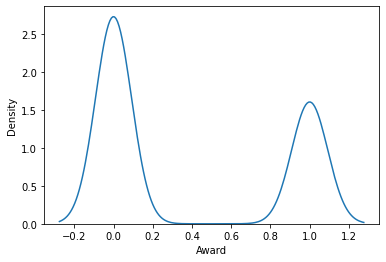

In [14]:
# Kde plot
import seaborn as sns
for n in air_lines.columns:
    print(n)
    sns.kdeplot(air_lines[n])
    plt.show()

In [ ]:
import seaborn as sns
for n in air_lines.columns:
    print(n)
    sns.kdeplot(air_lines[n])
    plt.show()

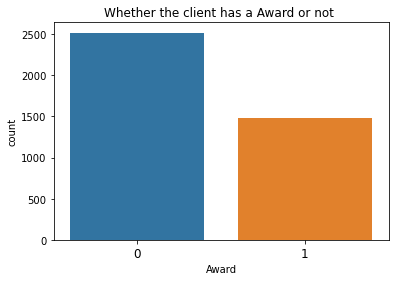

In [437]:
sns.countplot(x='Award', data=air_lines, 
              order=air_lines['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')
plt.show()

### Normalizing the Data

In [438]:
import warnings
warnings.filterwarnings('ignore')
# Using MinMaxsScaler to scale the data
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

air_lines_df = minmax.fit_transform(air_lines)
air_lines_df.shape

(3999, 11)

In [439]:
air_lines_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

## 1. Hierarchical Clustering

### A. Single Linkage

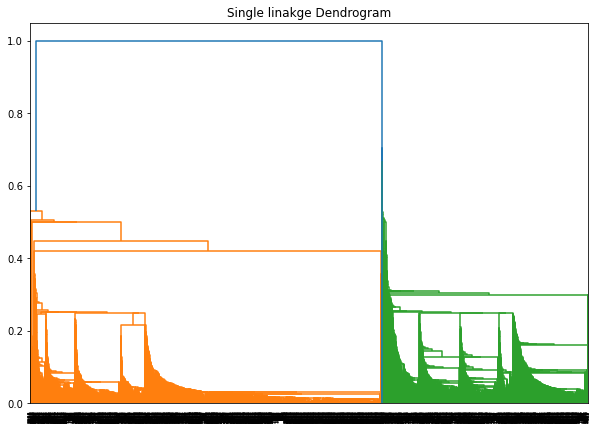

In [440]:
# Creating dendogram for signle linkage methods
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Single linakge Dendrogram")  
dend = shc.dendrogram(shc.linkage(air_lines_df, method='single'))

In [441]:
# Building model with agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
cluster.fit_predict(air_lines_df)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [445]:
# fitting and predicting model
y_sing=cluster.fit_predict(air_lines_df)
y_sing

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [446]:
silhouette_score1 = sil(air_lines_df, y_sing)
print('Silhouette Score for single linkage method is :',silhouette_score1)

Silhouette Score for single linkage method is : 0.48129679558120275


### B. Complete Linkage

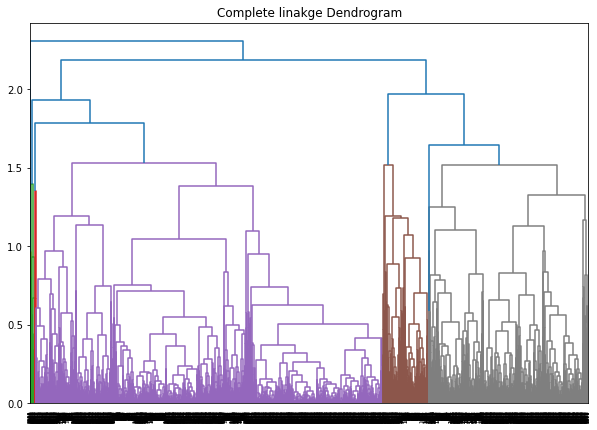

In [447]:
# Creating dendogram for complete linkage methods
plt.figure(figsize=(10, 7))  
plt.title("Complete linakge Dendrogram")  
dend = shc.dendrogram(shc.linkage(air_lines_df, method='complete'))

In [448]:
# Formings the cluster model with agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
cluster.fit_predict(air_lines_df)

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [449]:
# fitting and predicting the cluster model
y_com=cluster.fit_predict(air_lines_df)
y_com

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [450]:
silhouette_score2 = sil(air_lines_df, y_com)
print('Silhouette Score for complete linkage method is :',silhouette_score2)

Silhouette Score for complete linkage method is : 0.46459708515197673


### C. Average Linakge

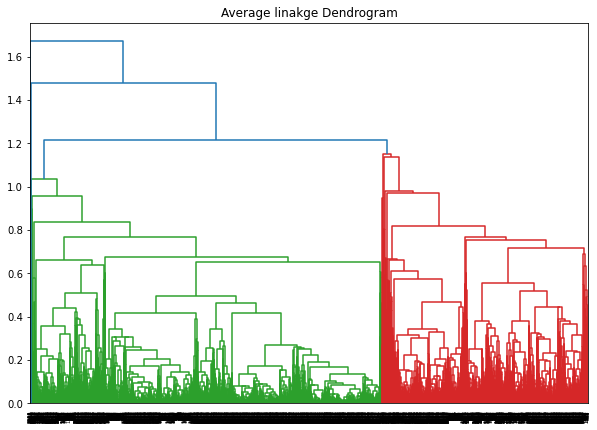

In [451]:
# Creating dendogram for Average linkage methods
plt.figure(figsize=(10, 7))  
plt.title("Average linakge Dendrogram")  
dend = shc.dendrogram(shc.linkage(air_lines_df, method='average'))

In [452]:
# building model with agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
cluster.fit_predict(air_lines_df)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [453]:
# fitting and predicting model
y_avg=cluster.fit_predict(air_lines_df)
y_avg

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [454]:
silhouette_score3 = sil(air_lines_df, y_avg)
print('Silhouette Score for complete linkage method is :',silhouette_score3)

Silhouette Score for complete linkage method is : 0.5286018409871408


## 2. K-Means Clustering

In [455]:
# Normalized Data
air_lines_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

### A. Elbow Method 

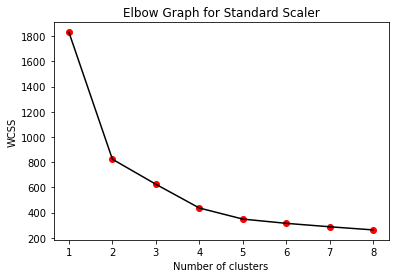

In [456]:
from sklearn.cluster import KMeans
# Within cluster sum of square criterion
nc=range(1,9)
wcss=[]
for i in nc:
    kmeans=KMeans(n_clusters=i,random_state=5)
    kmeans.fit(air_lines_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs silhscore to get silhoutte graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [457]:
# No. of clusters along with wcss scores in a DataFrame
wcss = pd.DataFrame({'Clusters':nc,'wcss':wcss})
wcss

,Clusters,wcss
0,1,1830.793213
1,2,823.675698
2,3,625.176821
3,4,436.708858
4,5,348.943428
5,6,315.151171
6,7,287.895168
7,8,263.050001


###  4 clusters Identified by using Elbow method

## DBSCAN

In [458]:
# Normalized Data
air_lines_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [472]:
# Applying DBSCAN
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=.1, min_samples=2)

In [473]:
# fitting and predicting normalized data
labels = dbs.fit_predict(air_lines_df)

In [474]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [475]:
labels

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [476]:
air_lines1["clusters"]=labels

In [477]:
air_lines1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [478]:
#grouping cluster id and ID
air_lines1.groupby(['clusters'])['ID#'].apply(lambda x:tuple(x))

clusters
-1     (9, 22, 23, 43, 44, 46, 51, 53, 60, 64, 66, 72...
 0     (1, 2, 3, 4, 6, 14, 15, 24, 25, 26, 27, 28, 32...
 1     (5, 16, 17, 36, 42, 81, 95, 111, 112, 125, 128...
 2     (7, 31, 45, 59, 61, 76, 78, 113, 118, 147, 151...
 3     (8, 18, 30, 37, 40, 48, 54, 58, 89, 92, 93, 96...
 4     (10, 19, 20, 29, 39, 49, 69, 71, 102, 121, 126...
 5     (11, 13, 47, 91, 119, 229, 232, 253, 266, 267,...
 6     (12, 21, 82, 88, 108, 150, 161, 164, 170, 173,...
 7     (33, 57, 68, 73, 80, 100, 127, 139, 146, 158, ...
 8                                            (117, 241)
 9     (131, 187, 237, 238, 245, 261, 379, 421, 468, ...
 10                                           (210, 214)
 11                                      (233, 259, 352)
 12                                           (273, 374)
 13                                           (413, 436)
 14                                          (522, 1002)
 15    (587, 749, 790, 852, 858, 911, 974, 1010, 1011...
 16                   

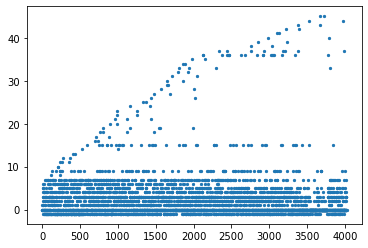

In [479]:
# Plotting scatter plot for ID and cluster id
plt.scatter(air_lines1["ID#"],air_lines1["clusters"],s=5)

In [480]:
score=sil(air_lines1,labels,metric='euclidean')
print('Silhouette score is:',score)

Silhouette score is: -0.6211764801749073


To obtain the clusters for all types of clustering method we first normalizes the data with minmaxscaler. After using normalized values we found that Average linkage gives good silhouette score than any other clusters.Wherese Kmeans is giving 4 clusters. DBSCAN score help to find out noise from the data. Where,noisy sample are given label -1.

## Problem Statement 2:
    
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [481]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A239-1DCD

 Directory of C:\Users\HP\OneDrive\Desktop\Sayali Assignments\Clustering

18-01-2023  16:04    <DIR>          .
18-01-2023  16:04    <DIR>          ..
18-01-2023  11:30    <DIR>          .ipynb_checkpoints
18-01-2023  16:04         1,681,932 Assignment no. 7.ipynb
05-12-2022  11:06             1,328 crime_data.csv
05-12-2022  11:06           268,963 EastWestAirlines.xlsx
               3 File(s)      1,952,223 bytes
               3 Dir(s)  148,656,988,160 bytes free


### Reading file

In [482]:
crime = pd.read_csv('crime_data.csv')

In [483]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### EDA

In [484]:
# shape of dataframe
crime.shape

(50, 5)

In [486]:
# decription of file
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [301]:
# file information
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [487]:
# checking presence of null values
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [488]:
# Checking duplicate values
crime.duplicated().sum()

0

In [489]:
# Calculating correlation
corr=crime.corr()
corr

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


### Visualization

<AxesSubplot:>

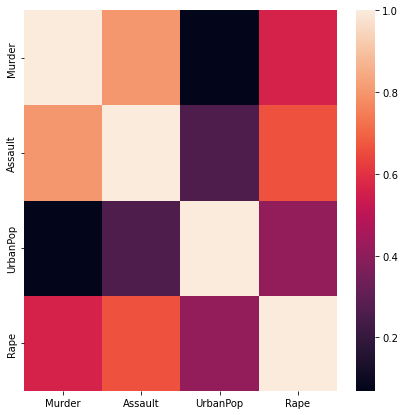

In [490]:
# Heatmap
plt.figure(figsize=(7,7))
sns.heatmap(corr)

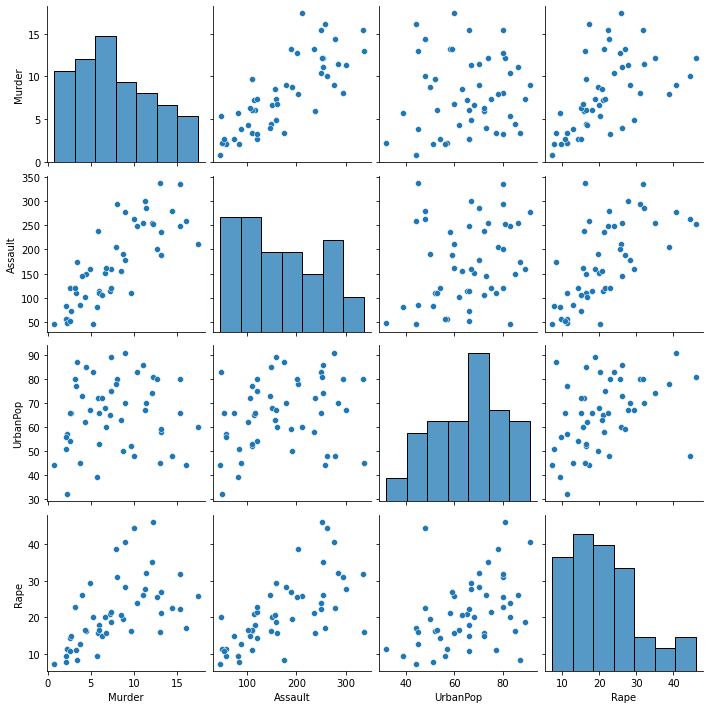

In [491]:
# Pairplot
sns.pairplot(crime)

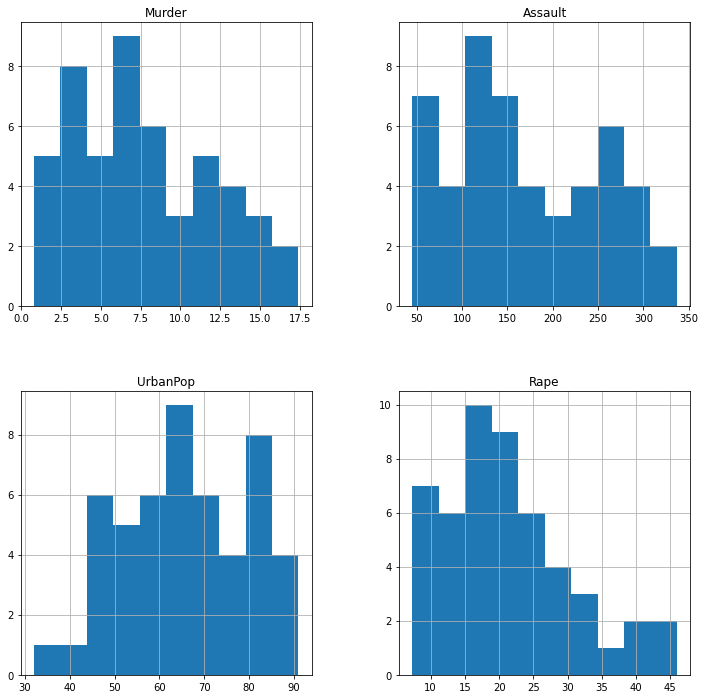

In [492]:
# Histogram
crime.hist(figsize=(12,12))
plt.show()

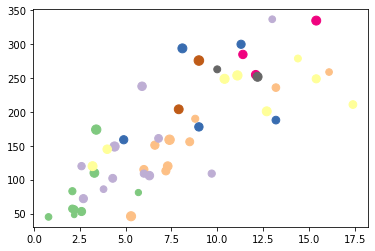

In [493]:
# Scatter plot
plt.scatter(crime['Murder'],crime['Assault'],crime['UrbanPop'],crime['Rape'],cmap=plt.cm.Accent)
plt.show()

### Data Preprocessing

In [494]:
crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [495]:
# picking Needed columns
crime1 = crime.iloc[:,1:]
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


Murder


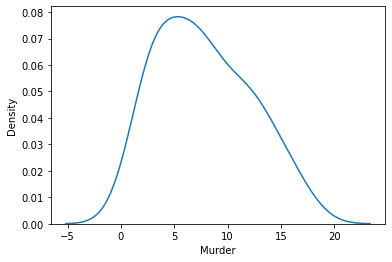

Assault


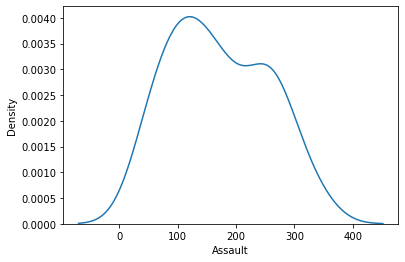

UrbanPop


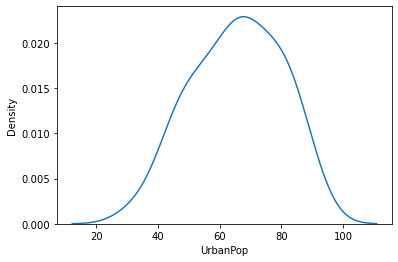

Rape


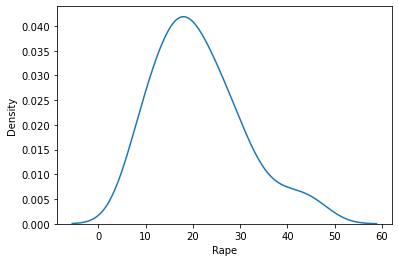

In [496]:
# Kde plot
import seaborn as sns
for n in crime1.columns:
    print(n)
    sns.kdeplot(crime1[n])
    plt.show()

### Normalize Data

In [532]:
# Normalizing Data with minmaxscaler
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [554]:
crime1_norm = norm_func(crime.iloc[:,1:])
crime1_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [555]:
crime1_norm.shape

(50, 4)

## 1. Hierarchical clustering

### A. Single Linkage

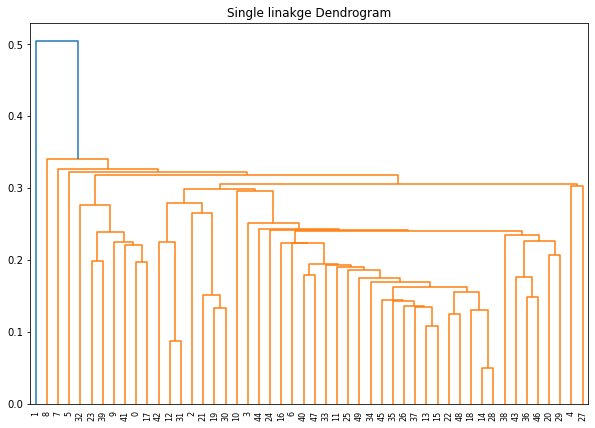

In [556]:
# Creating dendogram for signle linkage methods
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Single linakge Dendrogram")  
dend = shc.dendrogram(shc.linkage(crime1_norm, method='single'))

In [557]:
# Building model using single linkage
cluster1 = AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='single')
cluster1.fit_predict(crime1_norm)

array([6, 3, 2, 2, 0, 4, 2, 1, 5, 6, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2,
       2, 6, 2, 2, 2, 0, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 6, 2, 6, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [558]:
# fitting and predicting model
y_sing=cluster1.fit_predict(crime1_norm)
y_sing

array([6, 3, 2, 2, 0, 4, 2, 1, 5, 6, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2,
       2, 6, 2, 2, 2, 0, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 6, 2, 6, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [559]:
silscore1 = sil(crime1_norm,y_sing)
print('Silhouette Score for single linkage method is :',silscore1)

Silhouette Score for single linkage method is : -0.0034333764345219554


## B. Complete Linkage

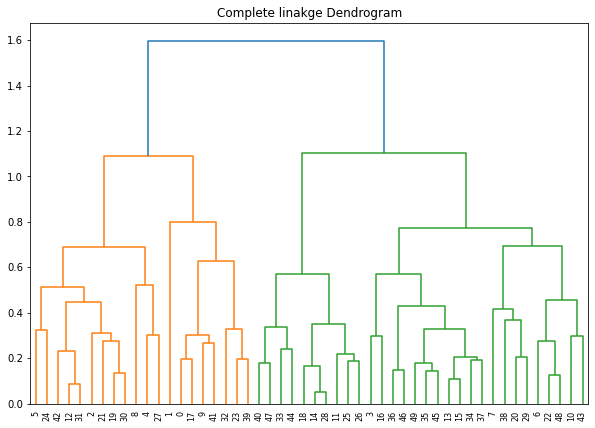

In [560]:
# Creating dendogram for complete linkage methods
plt.figure(figsize=(10, 7))  
plt.title("Complete linakge Dendrogram")  
dend = shc.dendrogram(shc.linkage(crime1_norm, method='complete'))

In [561]:
# Building model using complete linkage
cluster2 = AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='complete')
cluster2.fit_predict(crime1_norm)

array([1, 4, 0, 5, 0, 0, 3, 6, 0, 1, 3, 2, 0, 5, 2, 5, 5, 1, 2, 0, 6, 0,
       3, 1, 0, 2, 2, 0, 2, 6, 0, 0, 1, 2, 5, 5, 5, 5, 6, 1, 2, 1, 0, 3,
       2, 5, 5, 2, 3, 5], dtype=int64)

In [562]:
y_com=cluster2.fit_predict(crime1_norm)

In [563]:
silscore2 = sil(crime1_norm,y_com)
print('Silhouette Score for single linkage method is :',silscore2)

Silhouette Score for single linkage method is : 0.2738764216820654


## C. Average Linkage

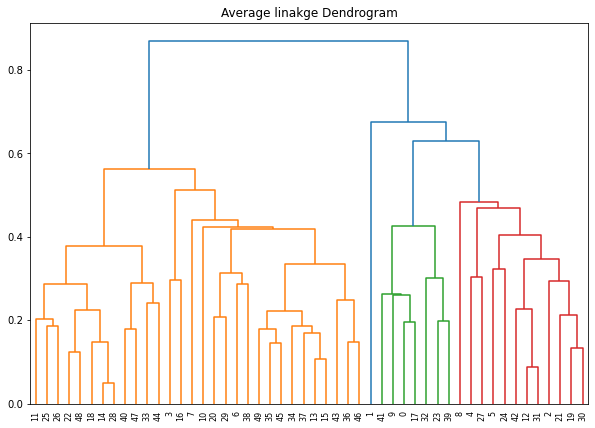

In [564]:
# Creating dendogram for complete linkage methods
plt.figure(figsize=(10, 7))  
plt.title("Average linakge Dendrogram")  
dend = shc.dendrogram(shc.linkage(crime1_norm, method='average'))

In [565]:
# Building model using average linkge
cluster = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
cluster.fit_predict(crime1_norm)

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [566]:
y_avg = cluster.fit_predict(crime1_norm)

In [567]:
silscore3 = sil(crime1_norm,y_avg)
print('Silhouette Score for single linkage method is :',silscore3)

Silhouette Score for single linkage method is : 0.3699239114027717


## 2. K-Means Clustering

In [568]:
# Normal Data
crime1_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


### Elbow Method

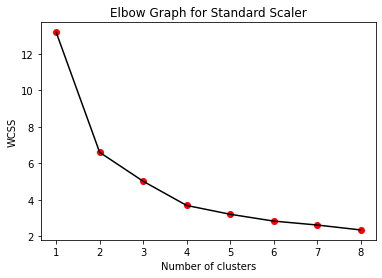

In [569]:
from sklearn.cluster import KMeans
# Within cluster sum of square criterion
nc=range(1,9)
wcss=[]
for i in nc:
    kmeans=KMeans(n_clusters=i,random_state=5)
    kmeans.fit(crime1_norm)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs silhscore to get silhoutte graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [570]:
# DataFrame of wcss and clusters
cluster = pd.DataFrame({'Clusters':nc,'wcss':wcss})
cluster

,Clusters,wcss
0,1,13.184123
1,2,6.596894
2,3,5.010878
3,4,3.683456
4,5,3.199918
5,6,2.825169
6,7,2.609287
7,8,2.340330


### 4 clusters are indentified by Elbow Method

## 3. DBSCAN

In [571]:
# Normalized Data
crime1_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [595]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=.1,min_samples=2)

In [596]:
y_labels = dbs.fit_predict(crime1_norm)
y_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [597]:
crime1['clusters']=y_labels
crime1

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [599]:
silscore3 = sil(crime1_norm,y_avg)
print('Silhouette Score for single linkage method is :',silscore3)

Silhouette Score for single linkage method is : 0.3699239114027717


### Inference

To form all the cluster methods we used normalized data. We found that Average gave best result as compaired to any other hierarchical method whereas single linkage gave negative value which means samples are assigned to wrong cluster. Whereas Kmeans gave the 4 cluster.DBSCAN score help to find out noise from the data. Where,noisy sample are given label -1.